In [1]:
#에러 코드 핸들링

import os

import warnings

 

import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt
 

#디렉토리 -> numpy 변환

import cv2



# 이미지 -> 디렉토리 및 라벨링

from keras.preprocessing.image import ImageDataGenerator

from keras.utils import to_categorical

 

#모델링

from keras.models import Sequential,load_model

from tensorflow.keras.layers import  Input, Conv2D, MaxPooling2D, Dense, Flatten, experimental, Dropout

 

# from tensorflow.keras.callbacks import ModelCheckpoint

 

 

import pandas as pd 

 

 

 
import datetime
 

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

warnings.filterwarnings(action='ignore')
 


In [2]:
# 데이터 증폭

train_data_augmentation = ImageDataGenerator(

    validation_split = 0.2,

    rotation_range=10,

    zoom_range = 0.3,

    width_shift_range=0.2,

    height_shift_range=0.2)

 

#train 데이터 설정 

train_data = train_data_augmentation.flow_from_directory(

        './images2/train',

        target_size = (300,300),

        batch_size=150,

        #color_mode ='rgb',

        classes = ['food','interior', 'exterior'],

        shuffle =True,

        class_mode='categorical')

 

 

# validation 데이터 설정

validation_data = train_data_augmentation.flow_from_directory(

        './images2/train',

        target_size = (300,300),

        batch_size=100,

        classes = ['food','interior', 'exterior'],

        shuffle =True,

        class_mode='categorical',

        subset='validation')

 

 

 

 

 

#test 데이터 설정

test_data = ImageDataGenerator().flow_from_directory(

        './images2/test',

        classes = ['food','interior', 'exterior'],

        target_size=(300,300),

        batch_size=25,

        shuffle =True,

        class_mode='categorical')


Found 38752 images belonging to 3 classes.
Found 7749 images belonging to 3 classes.
Found 6248 images belonging to 3 classes.


In [3]:


model = Sequential([

Input(shape=(300,300,3), name='input_layer'),

# experimental.preprocessing.Resizing(

# height=1./255, width=1./255, interpolation="nearest", name='resizing_Layer'),

# BatchNormalization(), 

experimental.preprocessing.Rescaling(1./255),

Conv2D(32,(3,3), activation='relu',name='Conv_layer1'),

MaxPooling2D(pool_size=(2,2),name='Pooling_layer2'),
    

Conv2D(32,(3,3), activation='relu',name='Conv_layer3'),

MaxPooling2D(pool_size=(2,2),name='Pooling_layer4'),

 

Conv2D(32,(3,3), activation='relu',name='Conv_layer5'),

MaxPooling2D(pool_size=(2,2),name='Pooling_layer6'),
    

Dropout(0.5),

Conv2D(16,(3,3), activation='relu',name='Conv_layer7'),

Conv2D(32,(3,3), activation='relu',name='Conv_layer8'),

MaxPooling2D(pool_size=(2,2),name='Pooling_layer9'),

Flatten(),

Dense(32, activation='relu',name='FC_layer10', kernel_initializer='glorot_uniform',),

Dense(16, activation='relu',name='FC_layer11', kernel_initializer='glorot_uniform',),

Dense(3, activation='softmax', name='output_layer')

])

 

 

# 3. 모델 학습과정 설정 및 요약

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])






Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 300, 300, 3)       0         
_________________________________________________________________
Conv_layer1 (Conv2D)         (None, 298, 298, 32)      896       
_________________________________________________________________
Pooling_layer2 (MaxPooling2D (None, 149, 149, 32)      0         
_________________________________________________________________
Conv_layer3 (Conv2D)         (None, 147, 147, 32)      9248      
_________________________________________________________________
Pooling_layer4 (MaxPooling2D (None, 73, 73, 32)        0         
_________________________________________________________________
Conv_layer5 (Conv2D)         (None, 71, 71, 32)        9248      
_________________________________________________________________
Pooling_layer6 (MaxPooling2D (None, 35, 35, 32)        0

In [4]:
a = datetime.datetime.now()
print('fitting start', a)

# 4. 모델 학습

history = model.fit(

    train_data,

    steps_per_epoch=10,

    epochs=20,

    validation_data=validation_data,

    validation_steps=10)

model.save('Model_Go_X2')

b = datetime.datetime.now()
print('Fitting End', b)
print('Fitting Time =' , b-a)

fitting start 2020-12-17 08:45:36.850770
Epoch 1/20
10/10 [==============================] - 116s 12s/step - loss: 1.0653 - accuracy: 0.4607 - val_loss: 1.0600 - val_accuracy: 0.4580
Epoch 2/20
10/10 [==============================] - 105s 10s/step - loss: 0.9816 - accuracy: 0.4567 - val_loss: 0.9507 - val_accuracy: 0.4720
Epoch 3/20
10/10 [==============================] - 102s 10s/step - loss: 0.9371 - accuracy: 0.5140 - val_loss: 0.9888 - val_accuracy: 0.4320
Epoch 4/20
10/10 [==============================] - 111s 11s/step - loss: 0.9489 - accuracy: 0.5040 - val_loss: 0.9166 - val_accuracy: 0.5060
Epoch 5/20
10/10 [==============================] - 196s 20s/step - loss: 0.9454 - accuracy: 0.4873 - val_loss: 0.9268 - val_accuracy: 0.5010
Epoch 6/20
10/10 [==============================] - 202s 20s/step - loss: 0.9234 - accuracy: 0.5220 - val_loss: 0.9183 - val_accuracy: 0.4950
Epoch 7/20
10/10 [==============================] - 207s 21s/step - loss: 0.9046 - accuracy: 0.5093 - val_l

In [5]:


def plot_loss_curve(history):

    plt.figure(figsize = (5,3))

    plt.plot(history['loss'])

    plt.plot(history['val_loss'])


    plt.title('model loss')

    plt.xlabel('epoch')

    plt.ylabel('loss')

    plt.legend(['train','test'], loc = 'upper right')

    plt.show


In [6]:

# 5. 모델 평가하기

print("-- Evaluate --")

scores = model.evaluate_generator(test_data, steps=5)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

 

# 6. 모델 사용하기

print("-- Predict --")

output = model.predict_generator(test_data, steps=5)

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(test_data.class_indices)

print(output)

 

 

-- Evaluate --
Instructions for updating:
Please use Model.evaluate, which supports generators.
accuracy: 63.20%
-- Predict --
Instructions for updating:
Please use Model.predict, which supports generators.
{'food': 0, 'interior': 1, 'exterior': 2}
[[0.604 0.331 0.065]
 [0.358 0.404 0.238]
 [0.127 0.297 0.576]
 [0.123 0.420 0.457]
 [0.083 0.678 0.239]
 [0.055 0.306 0.639]
 [0.096 0.324 0.580]
 [0.008 0.127 0.866]
 [0.137 0.387 0.476]
 [0.067 0.487 0.446]
 [0.549 0.359 0.092]
 [0.610 0.280 0.110]
 [0.411 0.464 0.125]
 [0.064 0.488 0.449]
 [0.479 0.450 0.070]
 [0.854 0.134 0.011]
 [0.279 0.510 0.211]
 [0.097 0.315 0.588]
 [0.010 0.140 0.850]
 [0.483 0.300 0.217]
 [0.044 0.280 0.676]
 [0.062 0.325 0.613]
 [0.328 0.531 0.141]
 [0.030 0.257 0.713]
 [0.039 0.236 0.725]
 [0.055 0.453 0.492]
 [0.195 0.435 0.370]
 [0.141 0.713 0.146]
 [0.249 0.368 0.383]
 [0.015 0.161 0.824]
 [0.123 0.368 0.509]
 [0.083 0.432 0.486]
 [0.059 0.586 0.354]
 [0.112 0.596 0.292]
 [0.259 0.432 0.309]
 [0.274 0.406 0.

{'loss': [1.0652960538864136, 0.9815729856491089, 0.9370598793029785, 0.9489135146141052, 0.9453779458999634, 0.9233524799346924, 0.9046363830566406, 0.9097017645835876, 0.8673001527786255, 0.8311710357666016, 0.8403632044792175, 0.8480934500694275, 0.8573737740516663, 0.8003442287445068, 0.8180673718452454, 0.8108075261116028, 0.835453450679779, 0.8085628151893616, 0.8083272576332092, 0.7832425236701965], 'accuracy': [0.4606666564941406, 0.4566666781902313, 0.5139999985694885, 0.5040000081062317, 0.4873333275318146, 0.5220000147819519, 0.5093333125114441, 0.5699999928474426, 0.5753333568572998, 0.6012839078903198, 0.6039999723434448, 0.5953333377838135, 0.5993333458900452, 0.6333333253860474, 0.6159999966621399, 0.6293333172798157, 0.6053333282470703, 0.6146666407585144, 0.6233333349227905, 0.6333333253860474], 'val_loss': [1.0600429773330688, 0.950718343257904, 0.9887660145759583, 0.9165522456169128, 0.9268007278442383, 0.9182630777359009, 0.9229534268379211, 0.9018517136573792, 0.84

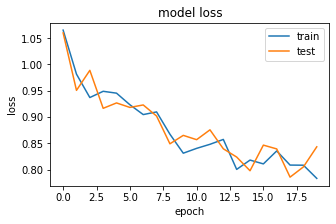

In [7]:


plot_loss_curve(history.history)

print(history.history)


print('train loss =', history.history['loss'][-1])

print('validation loss =', history.history['val_loss'][-1])

 
    

 


In [ ]:


# 영광스러운 디렉토리 -> 넘파이 어레이 변환..! 

 
x=np.concatenate([test_generator.next()[0] for i in range(test_generator.__len__())])

y=np.concatenate([test_generator.next()[1] for i in range(test_generator.__len__())])

print(x.shape)

print(y.shape)


In [ ]:

def predict_image_sample(model,X_test, y_test, test_id= -1 ):

    if test_id <0 :

        from random import randrange

        test_sample_id = randrange(9000)

    else:

        test_sample_id = test_id


    test_image =X_test[test_sample_id]

 

 

    #이미지로 만들기!! 

    image = cv2.cvtColor(x[test_sample_id], cv2.COLOR_BGR2RGB)

    pixels = np.array(x[test_sample_id],np.int32)

    plt.imshow(pixels)

    plt.show()

    
    test_image = test_image.reshape(1,300,300,3)

    print(test_generator.class_indices)

    y_actual = y_test[test_sample_id]

    print('y_actual number = ', y_actual)

    

    y_pred = model.predict(test_image)

    print("y_pred = ", y_pred)

    y_pred = np.argmax(y_pred, axis = 1)[0]

    print('y_pred number = ', y_pred)

In [ ]:
if __name__ == '__main__' :
    model = load_model('model-Go_X')
    X_test , y_test = x,y
    predict_image_sample(model,X_test, y_test)